# Introduction to Pandas

This is a draft version of my lecture on pandas. It will be updated. Stay tuned! 
---

Pandas is an open source, BSD-licensed (open source ) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.   
I try to show you the basic operations, that can be done using Pandas, for more complex stuff please use StackOverflow or [this](https://drive.google.com/file/d/1scz1gMMVGkfd9fWBVRPOCupCy5FwXo9s/view?usp=sharing) book. DO NOT REDISTRIBUTE IT! 


You can treat this notebook as a cheat-sheet.

### Let's start from a couple of imports
I prefere to keep all imports in the first executable cell. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

## Import the data
In the purpose of this exercises, I will use database of Titanic passanger, avialable through the Seaborn library. 

Importing data in Pandas is very simple. For instance, if you want to get data from *.csv* file you just need to execute:



``` python
train_data_file = "training_set.csv"
trainig_df = pd.read_csv(train_data_file)
trainig_df.head()
```

Analysys data taken from sql query is also very simple: 

``` python
import sqlite3
connection = sqlite3.connect("sans.db")
query = """
SELECT department, count(*) as cnt
FROM MyTable
WHERE CompletedTraining = 'Incomplete'
GROUP BY department
"""
df = pd.read_sql_query(query, connection)
```

In [0]:
titanic_df = sns.load_dataset('titanic')
titanic_df.to_csv("titanic.csv")

In [0]:
from google.colab import files
files.download('titanic.csv')

## Calculate basic statistics
Now, let's try to understand this dataset. This is the essential step in every data analysis.  
In the beginning, we will print the data and some basic statistics. 

To display first n-line of DataFrame you can use **head(n)** or **tail(n)** method. 

In [0]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
titanic_df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [0]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is two way to get access to each particular column. 

In [0]:
titanic_df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [0]:
titanic_df["sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

## Categorical variables
Now let's take a look at the categorical variable.  
First I show what is the number of nique embark_town, and then we show what is the name of this towns. 

From Machine Learning perspective, ***nunique()*** can be use to count nb of class to predict. 

In [0]:
titanic_df.embark_town.nunique()

3

In [0]:
titanic_df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

## Data Selection
One of the most useful features of the pandsa is data selection.  
You just need to use []. Inside the bracket you need to put the condition. As an example, let's select only womans. 

In [0]:
female_df = titanic_df[[titanic_df.sex, titanic_df.age]]
female_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


You can create more complicated conditions, for instance you want to select only adult womans.

In [0]:
adult_woman_df = titanic_df[(titanic_df.sex == "female") &
                           (titanic_df.age > 18)
                           ]
adult_woman_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Add columns
Very often you need to add columns. Pandas syntax is similar to the dictionary.  
Now, I will show you a couple of ways to do it. Usage of the particular method depends on the complexity of the conditions.   
I'll start from the easies one. The example is rather stupid, but the goal is to show the idea. 

In [0]:
titanic_df["fare_per_class"] = titanic_df.fare/ titanic_df.pclass
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_per_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.416667
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.283300
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.641667
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.100000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.683333


To create new column base on some condition you can use following syntax:
```python
np.where(condition, true_value, false_value)
```



In [0]:
titanic_df["embark_country"] = np.where(titanic_df.embark_town=="Cherbourg",
                                       "France",
                                       "UK")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_per_class,embark_country
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.416667,UK
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.283300,France
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.641667,UK
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.100000,UK
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.683333,UK


In case of even more complex conditions you can use 
```python
apply(_function)
```
If you are lazy, you can use **lambda** syntax.
```python
series.apply(lambda x: x**2)
```


In [0]:
titanic_df["fare_square"] = titanic_df.fare.apply(lambda fare: fare**2)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_per_class,embark_country,adult_rich_woman,fare_square
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.416667,UK,False,52.562500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.283300,France,True,5081.308859
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.641667,UK,False,62.805625
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.100000,UK,True,2819.610000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.683333,UK,False,64.802500


To get access to entire row you need to also set the axis to 1

```python
DataFrame.apply(function, axis=1)
```

In [0]:
def is_adult_rich_woman(row):
  age_limit = 18
  status  = row.pclass == 1
  status &= row.sex == "female" 
  status &= row.age > age_limit
  return status

In [0]:
titanic_df["adult_rich_woman"] = titanic_df.apply(is_adult_rich_woman, axis=1)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_per_class,embark_country,adult_rich_woman,fare_square
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.416667,UK,False,52.562500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,71.283300,France,True,5081.308859
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.641667,UK,False,62.805625
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,53.100000,UK,True,2819.610000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.683333,UK,False,64.802500


## Gruping

An essential piece of analysis of large data is efficient summarization: computing aggregations like **sum()**, **mean()**, **median()**, **min()**, and **max()**, 
in which a single number gives insight into the nature of a potentially large dataset.

To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof. 
Let's look at survival rate by gender.


In [0]:
titanic_df.groupby('sex')[['survived']].mean()


,survived
sex,
female,0.742038
male,0.188908


In [0]:
titanic_df.groupby(['sex', 'class'])['survived'].aggregate(['mean',"count"])

mean  count
sex    class                  
female First   0.968085     94
       Second  0.921053     76
       Third   0.500000    144
male   First   0.368852    122
       Second  0.157407    108
       Third   0.135447    347

In [0]:
titanic_df.groupby(['sex', 'class'])['survived'].describe()

count      mean       std  min  25%  50%  75%  max
sex    class                                                     
female First    94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
       Second   76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
       Third   144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0
male   First   122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
       Second  108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
       Third   347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0

In [0]:
aggregation_rules = {'sex':[sum, max], 'class':[max]}
titanic_df.groupby(['sex', 'class'])['survived'].aggregate(aggregation_rules)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


class sex    
                max sum max
sex    class               
female First      1  91   1
       Second     1  70   1
       Third      1  72   1
male   First      1  45   1
       Second     1  17   1
       Third      1  47   1

## Data visualization
The data visualization is a very broad topic, today I will show you how to make a simple plot using the matlibplot library.   
At first, let me present how to make a histogram.  
My recomendation is to create separete function for eqch histogram type. 


In [0]:
def print_basic_histogram(data):
  plt.figure(figsize=(10,6));
  hist_params = {'normed': False, 'bins': 20, 'alpha': 0.4}
  plt.hist(data.dropna());
  plt.ylabel('# count ')
  plt.xlabel('age [years]')

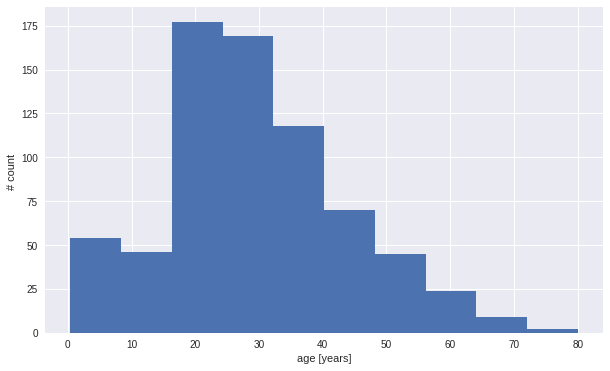

In [0]:
print_basic_histogram(titanic_df.age)

In [0]:
def pairplot(data, vars):
  plot_kws={'alpha': 0.5, 
            'marker': '.'}
  sns.pairplot(data.dropna(),
               hue="survived",
               vars=vars,
               diag_kind="kde",
               size=3, plot_kws=plot_kws);

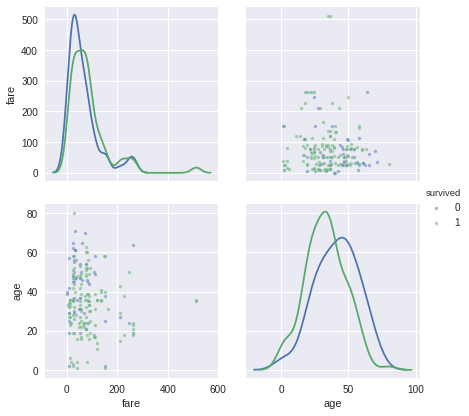

In [0]:
pairplot(titanic_df, ["fare","age"])

# Homework Assigment

Your job is to grab [this](http://archive.ics.uci.edu/ml/datasets/credit+approval) data and analyze it.  
Credit Approval Data Set. This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.




I hope you will have fun doing this assignment.  

# Next week
Numpy + Scipy + Intro to ML 